In [1]:
import os
from pathlib import Path
os.chdir(f"{Path.cwd().parent}")

In [2]:
from adaboost import AdaBoost

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df_tic_tac_toe = pd.read_csv("data/tic-tac-toe.data")
df_tic_tac_toe.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [5]:
x = pd.get_dummies(df_tic_tac_toe.drop(columns=['positive'])).values

In [6]:
y = df_tic_tac_toe['positive'].replace({"positive": 1, "negative": -1}).values

In [7]:
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
training_score_histories = list()
test_score_histories = list()
for train_index, test_index in rkf.split(x, y):
    adaboost = AdaBoost(n_stumps=500)
    training_score_history, test_score_history = adaboost.fit(x[train_index], y[train_index], x_test=x[test_index], y_test=y[test_index])
    training_score_histories.append(training_score_history)
    test_score_histories.append(test_score_history)

In [8]:
training_score_history_fold_mean = np.array(training_score_histories).mean(axis=0)
test_score_history_fold_mean = np.array(test_score_histories).mean(axis=0)

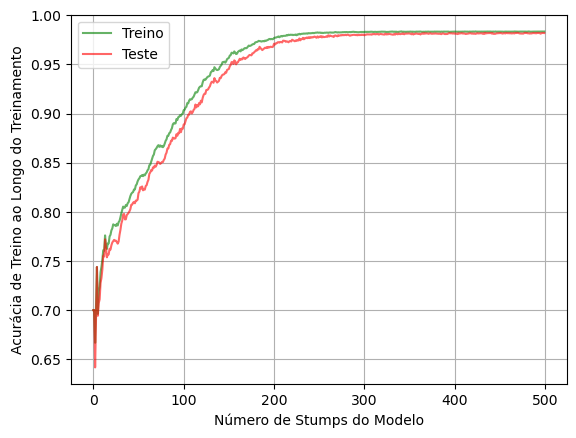

In [9]:
sns.lineplot(training_score_history_fold_mean, label="Treino", color="green", alpha=0.6)
sns.lineplot(test_score_history_fold_mean, label="Teste", color="red", alpha=0.6)
plt.ylabel("Acurácia Longo do Treinamento")
plt.xlabel("Número de Stumps do Modelo")
plt.grid()
plt.show()

In [10]:
print(f"Acurácia final do modelo {test_score_history_fold_mean[-1]}")

Acurácia final do modelo 0.9819208115183247
